This scripts aims at analyzing the output Exp5, that is, the CMD with trained other properties (TPSA, MR, LASA): correctness, diversity and novelty. Only one iteration is used.

In [1]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import Chem
from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import time

/home/gcolmenarejo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


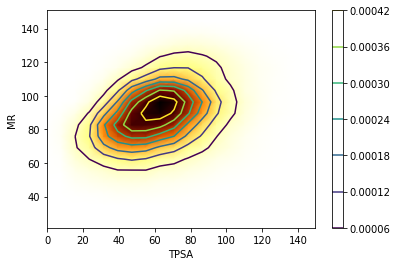

In [7]:
#######################################
### Unconditional CMD output molecules
#######################################

# Init the time counter for the whole notebook
start = time.time()



# 2D plot of TPSA vs MR of training set
data_uri='./exp5set.csv'
Y = pd.read_csv(data_uri)
mf.bidiplot(np.asarray(Y[["tpsa","mr"]]), "TPSA","MR", d = True)

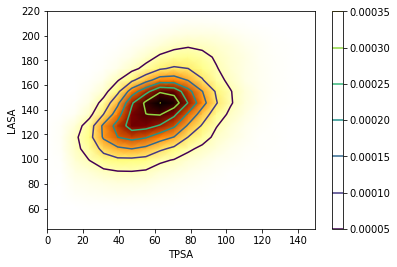

In [9]:
mf.bidiplot(np.asarray(Y[["tpsa","lasa"]]), "TPSA","LASA", d = True)

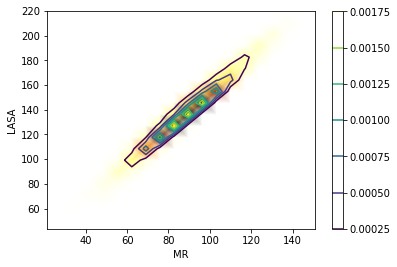

In [10]:
mf.bidiplot(np.asarray(Y[["mr","lasa"]]), "MR","LASA", d = True)

In [11]:
it = [300000]

df_un, cls_un = mf.wholean(it = it, name_train = "train", name_pref = "unc")

IOError: File ./train300000.smi does not exist

In [4]:
# Show the results in the output dataframe

df_un

,# train,%corr inp,# un train,# clus inp,# fram inp,# gen fram inp,# out,%corr out,# un out,# clus out,# fram out,# gen fram out,% new str,% new fram,% new gen fram
1,50000.0,100.0,39733.0,10210.0,15128.0,32105.0,5000.0,95.04,2948.0,1496.0,1744.0,2754.0,6.65,15.25,25.74
2,81661.0,100.0,64650.0,13462.0,22207.0,52264.0,5000.0,95.18,3054.0,1596.0,1825.0,2878.0,5.83,14.41,22.83


In [5]:
# Save the results

df_un.to_csv("analysis1-NP-un.csv")

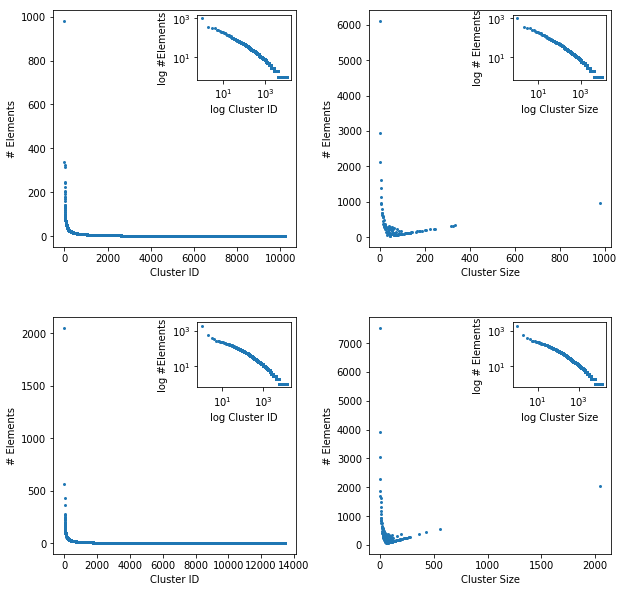

In [6]:
# Plot the clusters distributions and cluster size distribution
mf.plotmulticlus(cls_un, 10, 10)

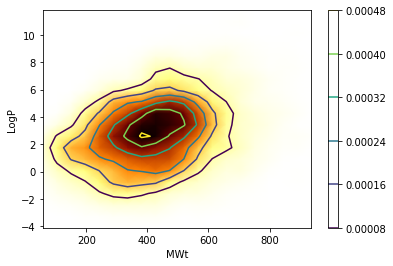

In [7]:
# 2D plot of MW vs logP of output set
smis = mf.smif2smis('./unc81661.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidf = mf.smis2smidf(smis)
smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['mwt'] = smidf['mol'].apply(Descriptors.MolWt)
smidf['logp'] = smidf['mol'].apply(Descriptors.MolLogP)
smidf = smidf[["mwt","logp"]]
mf.bidiplot(np.asarray(smidf), "MWt","LogP", d = True)

In [8]:
#######################################
### Conditional CMD output molecules
#######################################

df_co, cls_co = mf.wholean(it = it, name_train = "train", name_pref = "con")

Clustering time: 00:00:05
Diversity analysis time: 00:03:00
Clustering time: 00:00:00
Diversity analysis time: 00:00:02
Arenas creation time: 00:00:00
Novelty analysis time: 00:02:18
Clustering time: 00:00:09
Diversity analysis time: 00:04:04
Clustering time: 00:00:00
Diversity analysis time: 00:00:02
Arenas creation time: 00:00:00
Novelty analysis time: 00:03:53


In [9]:
# Show the results dataframe

df_co

,# train,%corr inp,# un train,# clus inp,# fram inp,# gen fram inp,# out,%corr out,# un out,# clus out,# fram out,# gen fram out,% new str,% new fram,% new gen fram
1,50000.0,100.0,39733.0,10210.0,15128.0,32105.0,5000.0,95.34,1100.0,744.0,534.0,970.0,17.09,26.59,47.84
2,81661.0,100.0,64650.0,13462.0,22207.0,52264.0,5000.0,96.88,1039.0,723.0,516.0,922.0,16.84,31.40,44.90


In [10]:
# Save the results dataframe

df_co.to_csv("analysis1-NP-co.csv")

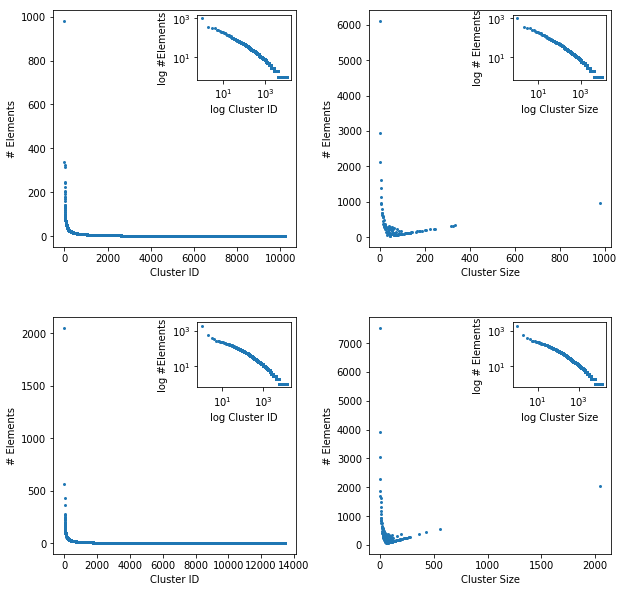

In [11]:
# Plot the clusters distributions and cluster size distribution

mf.plotmulticlus(cls_co, 10, 10)

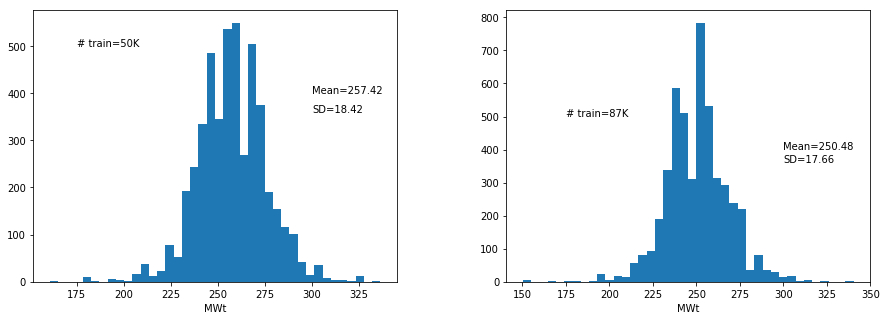

In [12]:
### Plot the bunch of histograms of mwt
it = [50000, 81661]
mwts = []

for n in it:
    smis = mf.smif2smis('./con' + str(n) + '.smi')
    ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
    smidf = mf.smis2smidf(smis)
    pt.AddMoleculeColumnToFrame(smidf,"smiles")
    smidf['mw'] = smidf['ROMol'].map(Descriptors.MolWt)
    del smidf["ROMol"]
    mwts.append(list(smidf['mw']))

leg = ["# train=50K","# train=87K"] 

mf.paintmultihist(mwts, "MWt", 1, 2, 300, 400, 15, 5, 175, 500, leg)

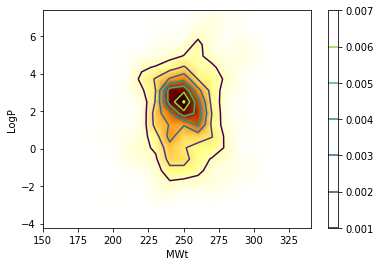

In [13]:
# 2D plot of MW vs logP of output set
smis = mf.smif2smis('./con81661.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smidf = mf.smis2smidf(smis)
smidf['mol'] = smidf['smiles'].apply(Chem.MolFromSmiles)
smidf['mwt'] = smidf['mol'].apply(Descriptors.MolWt)
smidf['logp'] = smidf['mol'].apply(Descriptors.MolLogP)
smidf = smidf[["mwt","logp"]]
mf.bidiplot(np.asarray(smidf), "MWt","LogP", d = True)

In [14]:
# End the time counter for the whole notebook
end = time.time()
eltime = end - start
print('Exp3Analysis execution time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))

Exp3Analysis execution time: 00:37:16
